In [30]:
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

In [31]:
data_dire="../feature"
# columns_drop=["s_mean_min5_mean","c_mean_min5_abs_mean","v_mean_min5_mean",
#                           "s_mean_min5_var","c_mean_min5_abs_var","v_mean_min5_var",
#                           "s_mean_min5_range","c_mean_min5_abs_range","v_mean_min5_range",
#                           "s_mean_min5_diff","c_mean_min5_abs_diff","v_mean_min5_diff",
#                           "s_mean_min10_mean","c_mean_min10_abs_mean","v_mean_min10_mean",
#                           "s_mean_min10_var","c_mean_min10_abs_var","v_mean_min10_var",
#                           "s_mean_min10_range","c_mean_min10_abs_range","v_mean_min10_range",
#                           "s_mean_min10_diff","c_mean_min10_abs_diff","v_mean_min5_diff",
#                           ]
columns_drop=['c1_1min_mean','c2_1min_mean', 'c3_1min_mean', 'c1_1min_var',
       'c2_1min_var', 'c3_1min_var', 'c1_1min_range',
       'c2_1min_range', 'c3_1min_range', 'mean_spindel','var_spindel', 'range_spindel',
              
        'v1_minvalue','v2_minvalue', 'v3_minvalue', 'v1_absmin', 'v2_absmin',
       'v3_absmin', 'v1_1min_mean','v2_1min_mean', 'v3_1min_mean', 'v1_1min_var',
       'v2_1min_var', 'v3_1min_var',  'v1_1min_range','v2_1min_range', 'v3_1min_range']

In [32]:
def plt_plot(y_real,y_predicted):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(range(len(y_real)),y_real, color='g')
    ax.plot(range(len(y_predicted)),y_predicted,color='r')
    plt.show()
def Error_compute(y_real,y_predicted):
    y_diff=y_real-y_predicted
    diff_positive=y_diff[y_diff>0]
    diff_negitive_0=y_diff[y_diff<=0]
    if diff_negitive_0.shape[0] >0:
        sum_negitive_error=sum(np.exp(-np.log(0.5)*(diff_negitive_0/5)))
    else:
        sum_negitive_error=0
    if diff_positive.shape[0] >0:
        sum_positive_error=sum(np.exp(np.log(0.5)*(diff_positive/20)))
    else:
        sum_positive_error=0
    return (sum_negitive_error+sum_positive_error)/len(y_real)

In [150]:
df_train=pd.DataFrame([])
test_index=1
for dire_index in [1,2,3]:
    df_feature = pd.read_csv(os.path.join(data_dire,"%d_v_c_s_feature.csv"%dire_index))
    df_cnn_result=pd.read_csv("../CNN/%d_cnn_predicted.csv"%dire_index)
    df_cnn_result=df_cnn_result/100
    if dire_index ==1:
        df_feature = df_feature[:-60]
    df_feature=pd.concat([df_feature,df_cnn_result[:df_feature.shape[0]]],axis=1)
    
#     df_feature.drop(columns=columns_drop,inplace=True)
    if dire_index == test_index:
        df_train1=df_feature[(df_feature["tool_age"]<=40)]
        df_test = df_feature[(df_feature["tool_age"]>40)&(df_feature["tool_age"]<=130)]
        df_validation=df_feature[(df_feature["tool_age"]>130)]
        df_train=df_train.append(df_train1)
    else:
        df_train=df_train.append(df_feature)
columns_list=list(df_train.columns)
columns_list.remove("residual_life")
columns_list.remove("predicted")
print(columns_list)
min_max_scaler = preprocessing.MinMaxScaler()

x_train = min_max_scaler.fit_transform(df_train[columns_list])
x_train = np.concatenate((x_train,df_train["predicted"].values.reshape(x_train.shape[0],-1)),axis=1)
y_train = df_train["residual_life"]

x_test = min_max_scaler.fit_transform(df_test[columns_list])
x_test = np.concatenate((x_test,df_test["predicted"].values.reshape(x_test.shape[0],-1)),axis=1)
y_test = df_test["residual_life"]

x_validation = min_max_scaler.fit_transform(df_validation[columns_list])
x_validation = np.concatenate((x_validation,df_validation["predicted"].values.reshape(x_validation.shape[0],-1)),axis=1)
y_validation = df_validation["residual_life"]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_validation.shape,y_validation.shape)

['c1_absmean', 'c2_absmean', 'c3_absmean', 'c1_absmedia', 'c2_absmedia', 'c3_absmedia', 'c1_absrange', 'c2_absrange', 'c3_absrange', 'c1_absstdn', 'c2_absstdn', 'c3_absstdn', 'c1_absvar', 'c2_absvar', 'c3_absvar', 'c1_maxvalue', 'c2_maxvalue', 'c3_maxvalue', 'c1_absmax', 'c2_absmax', 'c3_absmax', 'c1_minvalue', 'c2_minvalue', 'c3_minvalue', 'c1_absmin', 'c2_absmin', 'c3_absmin', 'tool_age', 'c1_1min_mean', 'c2_1min_mean', 'c3_1min_mean', 'c1_1min_var', 'c2_1min_var', 'c3_1min_var', 'c1_1min_range', 'c2_1min_range', 'c3_1min_range', 'mean_spindel', 'var_spindel', 'range_spindel', 'v1_absmean', 'v2_absmean', 'v3_absmean', 'v1_absmedia', 'v2_absmedia', 'v3_absmedia', 'v1_absrange', 'v2_absrange', 'v3_absrange', 'v1_absstdn', 'v2_absstdn', 'v3_absstdn', 'v1_absvar', 'v2_absvar', 'v3_absvar', 'v1_maxvalue', 'v2_maxvalue', 'v3_maxvalue', 'v1_absmax', 'v2_absmax', 'v3_absmax', 'v1_minvalue', 'v2_minvalue', 'v3_minvalue', 'v1_absmin', 'v2_absmin', 'v3_absmin', 'v1_1min_mean', 'v2_1min_mean', '

In [151]:
# clf = SVR(gamma=100,C=0.9)
clf=SVR()
print(clf)
clf.fit(x_train, y_train)
print("fit finished")


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
fit finished


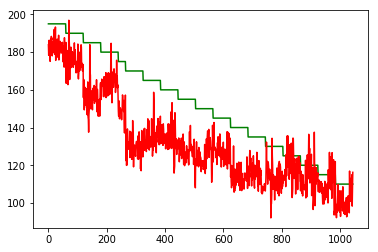

In [152]:
y_predicted=clf.predict(x_test)

df_result=pd.DataFrame({"real":y_test,"predicted":y_predicted})
plt_plot(y_test,y_predicted)

0.6498218365014279


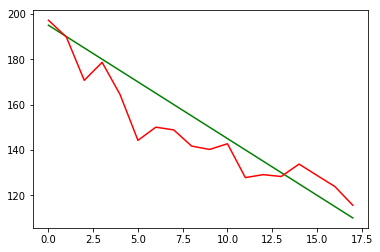

In [159]:
df_predict=df_result["predicted"].groupby(df_result['real']).mean()
df_predict=df_predict+15
err=Error_compute(df_predict.index,df_predict)
df_predict=df_predict.sort_index(ascending=False)
print(err)
plt_plot(df_predict.index,df_predict)

[0, -52.969229419529626, -26.356611991672395, 15.686012107297103, 0.3585118124433393, -11.697557061908128, -11.053067600944644, 8.54994636037921, -1.899491967719655, -5.520514564684106, -9.294019049809549, -2.903617721428489, 3.299811028367813, -1.2417184480134438, -22.934638970267272, 9.10610599069004, -4.197204140430102, -3.174152641090231] 18 (18,)
2 -100.26626024189547 701.4348163246907 0.014056101515611114 9.859438984843889 -6.33907222497271
3 -126.5802046608704 467.6268519266469 0.02064863258382319 9.655855051763224 -7.510464975508341
4 -100.36220274248217 683.4885670877661 0.013930509636012781 9.521344069920692 -6.328444084215552
5 -96.74999710235491 589.1369477674464 0.015904472049820505 9.369912119283915 -6.459235264485516
6 -108.28776975819903 491.07511175497825 0.018723159732402742 9.194477757995985 -6.933873411586398
7 -119.13463571753171 421.1766390634306 0.021364067890761916 8.998046310954058 -7.438380106156727
8 -107.97966138077805 416.0327544843566 0.0211703394062667 8.

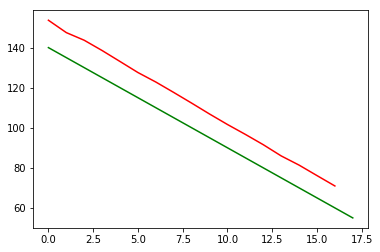

In [98]:
# print(df_predict)
predict_dif_list=[0]
for _ in df_predict.index[:-1]:
    predict_dif_list.append(df_predict[_-5]-df_predict[_])
print(predict_dif_list,len(predict_dif_list),df_predict.shape)

dif_k_1=10
v_k_list=[]
for _ in range(2,len(predict_dif_list)+1):
    Z_k=np.mean(predict_dif_list[0:_]-(240-df_predict[df_predict.index[_-1]]))
    R_k=np.var(predict_dif_list[0:_])
    K_=dif_k_1/(dif_k_1+R_k)
#     v_k=(-5-(210-df_predict[df_predict.index[_-1]]))+(K_*(Z_k-(-5)))
    v_k=-5+(K_*(Z_k-(-5)))
    dif_k_1=(1-K_)*dif_k_1
    
    v_k_list.append(210-(40+_*5)+v_k)
    print(_,Z_k,R_k,K_,dif_k_1,v_k)
err=Error_compute(np.array(df_predict.index[1:]),v_k_list)
print(err)
print(v_k_list)
plt_plot(df_predict.index,np.array(v_k_list))


In [146]:
df_feature = pd.read_csv(os.path.join(data_dire,"1_v_c_s_feature.csv"))
df_feature = df_feature[:-60]
df_feature["residual_life"]=(48*5)-df_feature['tool_age']
df_feature.drop(columns=columns_drop,inplace=True)
df_train1=df_feature
# df_train1=df_feature[(df_feature["tool_age"]<=40)]
# df_test = df_feature[(df_feature["tool_age"]>40)&(df_feature["tool_age"]<=130)]
# df_validation=df_feature[(df_feature["tool_age"]>130)]

df_feature = pd.read_csv(os.path.join(data_dire,"2_v_c_s_feature.csv"))
df_feature["residual_life"]=(48*5)-df_feature['tool_age']
df_feature.drop(columns=columns_drop,inplace=True)
df_train2=df_feature
# df_train2=df_feature[(df_feature["tool_age"]<=40)]
# df_test = df_feature[(df_feature["tool_age"]>40)&(df_feature["tool_age"]<=130)]
# df_validation=df_feature[(df_feature["tool_age"]>130)]

df_feature = pd.read_csv(os.path.join(data_dire,"3_v_c_s_feature.csv"))
df_feature["residual_life"]=(37*5)-df_feature['tool_age']
df_feature.drop(columns=columns_drop,inplace=True)
df_train3=df_feature
df_train3=df_feature[(df_feature["tool_age"]<=40)]
df_test = df_feature[(df_feature["tool_age"]>40)&(df_feature["tool_age"]<=130)]
df_validation=df_feature[(df_feature["tool_age"]>130)]

df_train=pd.concat([df_train1,df_train2],axis=0)
df_train=pd.concat([df_train,df_train3],axis=0)
print(df_train.shape,df_test.shape)
columns_list=list(df_train.columns)
columns_list.remove("residual_life")
print(columns_list)
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(df_train[columns_list])
y_train = df_train["residual_life"]
x_test = min_max_scaler.fit_transform(df_test[columns_list])
y_test = df_test["residual_life"]
x_validation = min_max_scaler.fit_transform(df_validation[columns_list])
y_validation = df_validation["residual_life"]                         
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_validation.shape,y_validation.shape)

(6002, 50) (1074, 50)
['c1_absmean', 'c2_absmean', 'c3_absmean', 'c1_absmedia', 'c2_absmedia', 'c3_absmedia', 'c1_absrange', 'c2_absrange', 'c3_absrange', 'c1_absstdn', 'c2_absstdn', 'c3_absstdn', 'c1_absvar', 'c2_absvar', 'c3_absvar', 'c1_maxvalue', 'c2_maxvalue', 'c3_maxvalue', 'c1_absmax', 'c2_absmax', 'c3_absmax', 'c1_minvalue', 'c2_minvalue', 'c3_minvalue', 'c1_absmin', 'c2_absmin', 'c3_absmin', 'tool_age', 'v1_absmean', 'v2_absmean', 'v3_absmean', 'v1_absmedia', 'v2_absmedia', 'v3_absmedia', 'v1_absrange', 'v2_absrange', 'v3_absrange', 'v1_absstdn', 'v2_absstdn', 'v3_absstdn', 'v1_absvar', 'v2_absvar', 'v3_absvar', 'v1_maxvalue', 'v2_maxvalue', 'v3_maxvalue', 'v1_absmax', 'v2_absmax', 'v3_absmax']
(6002, 49) (6002,) (1074, 49) (1074,) (547, 49) (547,)
